<a href="https://colab.research.google.com/github/JUKYUNGYOO/crawler/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

class Review:
    def __init__(self, comment, date, star, good, bad):
        self.comment = comment
        self.date = date
        self.star = star
        self.good = good
        self.bad = bad

    def show(self):
        print("내용:" + self.comment +
              "\n날짜:" + self.date +
              "\n별정:" + self.star +
              "\n좋아요:" + self.good +
              "\n싫어요:" + self.bad)
def crawl(url):
    soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
    review_list = []
    # h_movie 클래스의 h3 태그에 포함되어 있는 a태그를 찾아서
    title = soup.find('h3', class_='h_movie').find('a').text.strip()
    # div클래스 의 score_result 클래스
    div = soup.find("div", class_="score_result")
    data_list = div.select("ul > li")
# ul 태그에 포함되어 있는 li 태그

    for review in data_list:
        star = review.find("div", class_="star_score").text.strip()
        reply = review.find("div", class_="score_reple")
        comment = reply.find("p").text.strip()
         # dt태그안에 em태그의 두번째가 날짜
        date = reply.select("dt > em")[1].text.strip()
        button = review.find("div", class_="btn_area")
        sympathy = button.select("a > strong")
        good = sympathy[0].text
        bad = sympathy[1].text
        review_list.append(Review(comment, date, star, good, bad))

    return title, review_list
title, review_list = crawl('https://movie.naver.com/movie/bi/mi/basic.nhn?code=36944')
print('제목:' + title)
for review in review_list:
    review.show()

def get_summary(review_list):
    star_list = []
    good_list = []
    bad_list = []

    for review in review_list:
        star_list.append(int(review.star))
        good_list.append(int(review.good))
        bad_list.append(int(review.bad))

    star_series = pd.Series(star_list)
    good_series = pd.Series(good_list)
    bad_series = pd.Series(bad_list)

    summary = pd.DataFrame({

        'Star ': star_series,
        'Good ': good_series,
        'Bad' : bad_series,
        'Score' : good_series/ (good_series+bad_series)
    })

    return summary


movie_code_list = [136900,167657,174321,184859,167391,186367,189035,175045]

review_lists = []
for i in movie_code_list:
    title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
    summary = get_summary(review_list)
    print("[ %s ]" % (title))
    print(summary)
    review_lists.append((title, review_list))




제목:올드보이
내용:이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.
날짜:2013.06.09 17:59
별정:10
좋아요:2912
싫어요:174
내용:충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.
날짜:2013.06.09 01:08
별정:10
좋아요:1870
싫어요:76
내용:사람은 상상력이 있어서 비겁해 지는거래...
날짜:2013.07.17 14:26
별정:10
좋아요:1667
싫어요:62
내용:10년만에 다시 본 올드보이. 역시 최고였다.
날짜:2013.07.28 01:53
별정:10
좋아요:1289
싫어요:61
내용:지금껏본 영화중 제일 재미있었다스토리 전개 하나도나무랄데 없는 작품
날짜:2013.06.06 23:11
별정:10
좋아요:1132
싫어요:66
[ 어벤져스: 엔드게임 ]
   Star   Good   Bad     Score
0     10  22717  640  0.972599
1     10  14974  424  0.972464
2     10  14582  451  0.969999
3     10  12556  519  0.960306
4     10  11322  409  0.965135
[ 명탐정 피카츄 ]
   Star   Good   Bad     Score
0     10   1886  103  0.948215
1     10    950   82  0.920543
2     10    805   71  0.918950
3      8    928  283  0.766309
4      8    589   35  0.943910
[ 고양이 여행 리포트 ]
   Star   Good   Bad     Score
0     10     61    5  0.924242
1     10     37    3  0.925000
2     10     24    2  0.923077
3     10     26    4  0.866667
4   

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


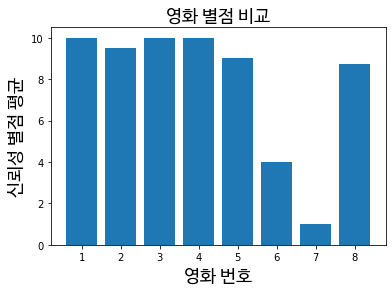

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path,size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie,review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score']>0.8]
    y.append(summary['Star '].mean())
    count+=1
  plt.bar(x,y)
  plt.title('영화 별점 비교',fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균',fontproperties=fontprop)
  plt.show()
movie_compare(review_lists)
